In [1]:
from tyssue import Sheet

from tyssue import PlanarGeometry as geom

from tyssue.draw import sheet_view

In [2]:
cellmap = Sheet.planar_sheet_2d('2DCellmap', 7, 7, 1, 1)

geom.update_all(cellmap)

C++ extension are not available for this version


/Users/v_lachina/opt/anaconda3/envs/VertexModel/lib/python3.9/site-packages/tyssue/topology/base_topology.py:168: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eptm.edge_df = eptm.edge_df.append(face_edges.iloc[0:1], ignore_index=True)
/Users/v_lachina/opt/anaconda3/envs/VertexModel/lib/python3.9/site-packages/tyssue/topology/base_topology.py:168: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eptm.edge_df = eptm.edge_df.append(face_edges.iloc[0:1], ignore_index=True)
/Users/v_lachina/opt/anaconda3/envs/VertexModel/lib/python3.9/site-packages/tyssue/topology/base_topology.py:168: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eptm.edge_df = eptm.edge_df.append(face_edges.iloc[0:1], ignore_index=True)
/Users/v_lachina/opt/anac

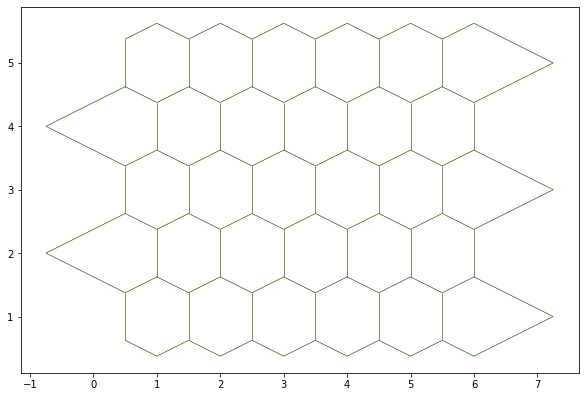

In [3]:
fig, axis = sheet_view(cellmap)

fig.set_size_inches(10, 10)

cellmap.sanitize ( trim_borders=True, order_edges=True )

geom.update_all(cellmap)

In [4]:
for element, data in cellmap.datasets.items():
    print(f"{element} dataset has values {data.shape}")

vert dataset has values (58, 3)
edge dataset has values (156, 20)
face dataset has values (30, 7)


In [5]:
spec = {
    "vert": {
        "x": 0.0,
        "y": 0.0,
        "active": True
    },
    "edge": {
        "tension": 0.0,
        "length": 1,
    },
    "face": {
        "area": 0.0,
        "alive": True,
    },
}

In [6]:
cellmap.update_specs({"edge": {"tension": 1.0}})
cellmap.edge_df['tension'].head()

edge
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: tension, dtype: float64

In [7]:
print('Faces associated with the first edges:')
print(cellmap.edge_df['face'].head())
print('\n')

sixth_edge = cellmap.edge_df.loc[6, 'face']

Faces associated with the first edges:
edge
0    0
1    0
2    0
3    0
4    1
Name: face, dtype: int64




In [8]:
print('Area of cell # {}:'.format(int(sixth_edge)))
print(cellmap.face_df.loc[sixth_edge, 'area'])

Area of cell # 4:
0.875


In [9]:
print('Upcasted areas over the edges:')
print(cellmap.upcast_face(cellmap.face_df['area']).head())

Upcasted areas over the edges:
edge
0    0.500
1    0.500
2    0.500
3    0.500
4    0.875
Name: area, dtype: float64


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

from tyssue import Sheet
from tyssue import PlanarGeometry
from tyssue.generation import generate_ring
from tyssue import config
from tyssue.draw import sheet_view

/Users/v_lachina/opt/anaconda3/envs/VertexModel/lib/python3.9/site-packages/tyssue/topology/base_topology.py:168: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eptm.edge_df = eptm.edge_df.append(face_edges.iloc[0:1], ignore_index=True)
/Users/v_lachina/opt/anaconda3/envs/VertexModel/lib/python3.9/site-packages/tyssue/topology/base_topology.py:168: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eptm.edge_df = eptm.edge_df.append(face_edges.iloc[0:1], ignore_index=True)
/Users/v_lachina/opt/anaconda3/envs/VertexModel/lib/python3.9/site-packages/tyssue/topology/base_topology.py:168: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eptm.edge_df = eptm.edge_df.append(face_edges.iloc[0:1], ignore_index=True)
/Users/v_lachina/opt/anac

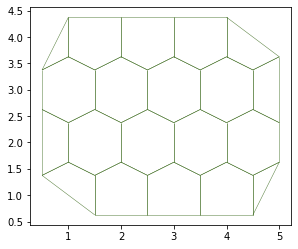

In [11]:
sheet_2d = Sheet.planar_sheet_2d('planar', nx=6, ny=6, 
                                 distx=1, disty=1)

sheet_2d.sanitize(trim_borders=True, order_edges=True)
fig, ax = sheet_view(sheet_2d)

In [19]:
centered2Dmap = sheet_2d.vert_df[sheet_2d.coords].mean(axis=0)
print("Sheet center of mass :")
print(centered2Dmap)

Sheet center of mass :
x    0.0
y    0.0
dtype: float64


In [13]:

# Translate vertices by - 

sheet_2d.vert_df[sheet_2d.coords] -= centered2Dmap

print("New center of mass :")
print(sheet_2d.vert_df[sheet_2d.coords].mean(axis=0))

New center of mass :
x    0.0
y    0.0
dtype: float64


In [17]:
sheet_2d.vert_df

,y,is_active,x
vert,,,
0,0.125,1,-2.25
1,0.875,1,-1.25
2,0.125,1,-0.25
3,0.875,1,-2.25
4,1.125,1,-1.75
5,-0.875,1,0.25
6,-0.125,1,0.25
7,-0.125,1,1.25
8,0.125,1,0.75


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image


from tyssue import config, Sheet, SheetGeometry, History, EventManager
from tyssue.draw import sheet_view
from tyssue.generation import three_faces_sheet
from tyssue.draw.plt_draw import plot_forces

from tyssue.dynamics import PlanarModel

from tyssue.solvers.viscous import EulerSolver
from tyssue.draw.plt_draw import create_gif



/Users/v_lachina/opt/anaconda3/envs/VertexModel/lib/python3.9/site-packages/tyssue/topology/base_topology.py:168: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eptm.edge_df = eptm.edge_df.append(face_edges.iloc[0:1], ignore_index=True)
/Users/v_lachina/opt/anaconda3/envs/VertexModel/lib/python3.9/site-packages/tyssue/topology/base_topology.py:168: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eptm.edge_df = eptm.edge_df.append(face_edges.iloc[0:1], ignore_index=True)
/Users/v_lachina/opt/anaconda3/envs/VertexModel/lib/python3.9/site-packages/tyssue/topology/base_topology.py:168: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eptm.edge_df = eptm.edge_df.append(face_edges.iloc[0:1], ignore_index=True)
/Users/v_lachina/opt/anac

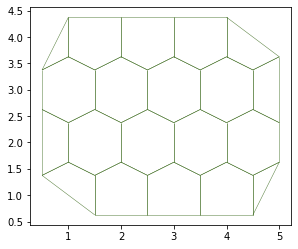

In [8]:
geom  = SheetGeometry
model = PlanarModel

sheet = Sheet.planar_sheet_3d('planar', nx=6, ny=6, 
                             distx=1, disty=1)
sheet.sanitize(trim_borders=True, order_edges=True)
geom.update_all(sheet)

fig, ax = sheet_view(sheet)

In [9]:
history = History(sheet, save_every=2, dt=1)

for i in range(10):
    
    geom.scale(sheet, 1.02, list('xy'))
    geom.update_all(sheet)
    # record only every `save_every` time 
    history.record()

create_gif(history, 'simple_growth.gif', num_frames=len(history))


Image('simple_growth.gif')

/Users/v_lachina/opt/anaconda3/envs/VertexModel/lib/python3.9/site-packages/tyssue/geometry/sheet_geometry.py:126: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  sheet.face_df[["height", "rho"]] = edge_height.mean(level="face")
/Users/v_lachina/opt/anaconda3/envs/VertexModel/lib/python3.9/site-packages/tyssue/geometry/sheet_geometry.py:126: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  sheet.face_df[["height", "rho"]] = edge_height.mean(level="face")
/Users/v_lachina/opt/anaconda3/envs/VertexModel/lib/python3.9/site-packages/tyssue/geometry/sheet_geometry.py:126: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and w

Converting didn't work, make sure imagemagick is available on your system


FileNotFoundError: [Errno 2] No such file or directory: 'convert'